In [ ]:
#House property price prediction

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# load datasets
df = pd.read_csv('data_file.csv')
df.head()

In [ ]:
df.info()

In [ ]:
df.describe()


In [ ]:
#pairplot to visualize relationship between variables
sns.pairplot(df)
plt.show()

#correlation matrix
correlation_matrix = df.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm')
plt.title('correlation matrix')
plt.show

In [ ]:
#Histograms of individuals features
df.hist(figsize=(12,10),bins=20)
plt.show()

#Box plots to check outliers
plt.figure(figsize=(12, 10))
for i, column in enumerate(df.columns):
    plt.subplot(4, 3, i+1)
    sns.boxplot(df[column])
    plt.title(column)
plt.tight_layout()
plt.show()
    

In [ ]:
#Simple Linear Regression 
#Define the target variable and the predictor variable
x= df[['median_income']]      #predictor
y= df['median_house_value']    #target

In [8]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=42)


In [9]:
#create and run the model
simple_model= LinearRegression()
simple_model.fit(x_train,y_train)

LinearRegression()

Mean Square Error :7091157771.76555
R^2 score:0.45885918903846656


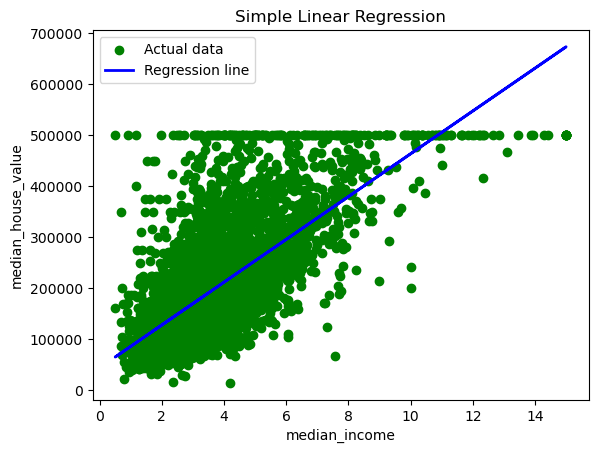

In [10]:
#Predictions
y_pred=simple_model.predict(x_test)

#Evaluate the model
print(f'Mean Square Error :{mean_squared_error(y_test,y_pred)}')
print(f'R^2 score:{r2_score(y_test,y_pred)}')

#plot the regression line
plt.scatter(x_test,y_test,color='green',label='Actual data')
plt.plot(x_test,y_pred,color='blue',linewidth=2,label='Regression line')
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

In [11]:
#Assuming the model has already been trained and the relevant libraries have been imported

#input median_income value from the user
median_income=float(input("enter the median_income value: "))

#Convert the input to a 2D array for the model
median_income_array=np.array([[median_income]])

#predict the house price using trained model
predicted_price=simple_model.predict(median_income_array)

#output the prediction
print(f"The predicted house price for median_income of {median_income} is : ${predicted_price[0]:.2f}")
 

enter the median_income value:  50


The predicted house price for median_income of 50.0 is : $2141152.20


In [17]:
#Multiple Linear Regression

#Define multiple predictors
x_multi = df[['longitude','latitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']]
y_multi = df['median_house_value']

In [18]:
#The dataset into training and testing sets
x_test_multi,x_train_multi,y_test_multi,y_train_multi = train_test_split(x_multi,y_multi,test_size=0.2,random_state=42)


In [19]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [20]:
df=df.fillna(df.mean(numeric_only=True))

In [21]:
#Create and train the model

multi_model = LinearRegression()
multi_model.fit(x_train_multi,y_train_multi)

LinearRegression()

In [22]:
#Predictions
y_pred_multi=multi_model.predict(x_test_multi)

#Evaluate the model
print(f'Mean Square Error :{mean_squared_error(y_test_multi,y_pred_multi)}')
print(f'R^2 score:{r2_score(y_test_multi,y_pred_multi)}')


Mean Square Error :4855295041.39064
R^2 score:0.6367912793184081


In [23]:
#Display the cofficients of the model
coefficients = pd.DataFrame(multi_model.coef_, x_multi.columns , columns=['coefficient'])
print(coefficients)

                     coefficient
longitude          -43371.398245
latitude           -43105.721120
housing_median_age   1026.292376
total_rooms            -4.040166
total_bedrooms         31.302062
population            -42.578746
households            123.247652
median_income       37859.805009
